<a href="https://colab.research.google.com/github/RifatMuhtasim/Deep_Learning/blob/main/Learn/24.Image_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Dataset Import
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
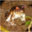

In [ ]:
X_train[0]

In [ ]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1, )
y_train[:3]

array([6, 9, 9], dtype=uint8)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
classes = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]

In [ ]:
def Plot_sample(X, y, index):
  plt.figure(figsize=(5, 1))
  plt.imshow(X[index])
  classes = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
  plt.xlabel(classes[y[index]])

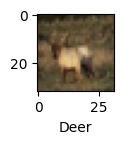

In [ ]:
Plot_sample(X_train, y_train, 3)

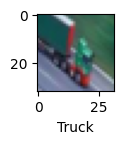

In [ ]:
Plot_sample(X_train, y_train, 50)

# Model Building

## ANN (Artifical Neural Network)

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="sigmoid")
])

ann.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 16s 9ms/step - loss: 1.8124 - accuracy: 0.3562
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6219 - accuracy: 0.4276
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5397 - accuracy: 0.4556
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4807 - accuracy: 0.4773
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4312 - accuracy: 0.4945
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3906 - accuracy: 0.5113
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3491 - accuracy: 0.5258
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3152 - accuracy: 0.5357
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2827 - accuracy: 0.5513
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.25

In [ ]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3439 - accuracy: 0.5264


[1.3439407348632812, 0.5264000296592712]

In [ ]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.59      0.60      1000
           1       0.59      0.71      0.64      1000
           2       0.47      0.32      0.38      1000
           3       0.33      0.44      0.38      1000
           4       0.41      0.49      0.45      1000
           5       0.52      0.28      0.36      1000
           6       0.60      0.55      0.57      1000
           7       0.57      0.65      0.61      1000
           8       0.71      0.60      0.65      1000
           9       0.52      0.64      0.57      1000

    accuracy                           0.53     10000
   macro avg       0.53      0.53      0.52     10000
weighted avg       0.53      0.53      0.52     10000



## CNN

In [ ]:
cnn = models.Sequential([
    # CNN
    layers.Conv2D(filters=32, kernel_size = (3,3), activation="relu", input_shape=(32, 32, 3) ),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    # Dense
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_test, y_test, epochs=10)

Epoch 1/10
313/313 [==============================] - 4s 5ms/step - loss: 1.8168 - accuracy: 0.3342
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 1.4279 - accuracy: 0.4804
Epoch 3/10
313/313 [==============================] - 2s 5ms/step - loss: 1.2784 - accuracy: 0.5425
Epoch 4/10
313/313 [==============================] - 1s 5ms/step - loss: 1.1708 - accuracy: 0.5848
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 1.0734 - accuracy: 0.6228
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 0.9993 - accuracy: 0.6511
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 0.9279 - accuracy: 0.6770
Epoch 8/10
313/313 [==============================] - 1s 4ms/step - loss: 0.8643 - accuracy: 0.7008
Epoch 9/10
313/313 [==============================] - 1s 4ms/step - loss: 0.8067 - accuracy: 0.7184
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.7280 - accuracy: 0.7461

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6233 - accuracy: 0.7896


[0.6233403086662292, 0.7896000146865845]

In [ ]:
# Classification Report
y_pred_cnn = cnn.predict(X_test)
y_pred_cnn_classes = [np.argmax(element) for element in y_pred_cnn]
print("Classification Report: \n", classification_report(y_test, y_pred_cnn_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.77      0.82      1000
           1       0.85      0.94      0.89      1000
           2       0.83      0.54      0.65      1000
           3       0.76      0.53      0.62      1000
           4       0.68      0.81      0.74      1000
           5       0.63      0.83      0.72      1000
           6       0.82      0.89      0.85      1000
           7       0.86      0.83      0.85      1000
           8       0.87      0.85      0.86      1000
           9       0.80      0.91      0.85      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

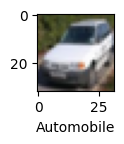

In [ ]:
Plot_sample(X_train, y_train, 46)

In [ ]:
y_test = y_test.reshape(-1, )

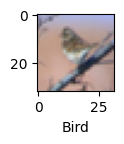

In [ ]:
Plot_sample(X_test, y_test, 129)

In [ ]:
y_pred_cnn_classes[15:35]

[8, 5, 7, 8, 6, 7, 0, 4, 9, 4, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9]

In [ ]:
y_test[15:35]

array([8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9],
      dtype=uint8)

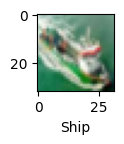

In [ ]:
Plot_sample(X_test, y_test, 15)

In [ ]:
classes[y_pred_cnn_classes[15]]

'Ship'